In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from bs4 import BeautifulSoup
import nltk
from multiprocessing import Pool
from sklearn.feature_extraction.text import CountVectorizer
import os
import time
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier


In [ ]:
import pandas as pd
data_train = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

In [ ]:
data_train.sort_index()

In [ ]:
data_test = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

In [ ]:
data_test.sort_index()

In [ ]:
data_train.sample()['response']

In [ ]:
def text_preprocess(text, lang, domain_stopwords=[]):

    stop_words = nltk.corpus.stopwords.words(portuguese) # lang='portuguese' or lang='english'

    # Transforma em caixa baixa
    s = str(text).lower()

    # Remove pontuação
    table = str.maketrans({key: None for key in string.punctuation.replace("'", "")})
    s = s.translate(table)
    s = s.translate(str.maketrans({"'" : " "}))

    # Obtenção dos tokens
    tokens = word_tokenize(s)


    words = [word for word in tokens if not word in stop_words and not word.isdigit()] # remove stopwords e dígitos

    # Lemmatizar os tokens
    lemmatizer = WordNetLemmatizer()
    words = list(map(lemmatizer.lemmatize, words))
    domain_stopwords = list(map(lemmatizer.lemmatize, domain_stopwords))

    words = [word for word in words if not word in domain_stopwords] # remove palavras de domínio


    return " ".join(words).strip()

In [ ]:
# Obtendo a bag-of-words
def compute_bag_of_words(dataset, lang, domain_stopwords=[]):
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(dataset['code0'])

    count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())

    return count_vect_df, vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
bow_train_df, vectorizer = compute_bag_of_words(data_train,'english')
bow_test_df = pd.DataFrame(vectorizer.transform(data_test['opinion']).todense(), columns=vectorizer.get_feature_names())

KeyError: 'code0'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregar conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

# Certifique-se de que todas as colunas são do tipo string
train_data['response'] = train_data['response'].astype(str)
train_data['code0'] = train_data['code0'].astype(str)

test_data['response'] = test_data['response'].astype(str)
test_data['code0'] = test_data['code0'].astype(str)

# Dividir o conjunto de dados em treino e teste
# (Você pode ajustar o tamanho do conjunto de teste conforme necessário)
# Mantive o mesmo random_state para reprodução consistente
X_train, X_test, y_train, y_test = train_test_split(
    train_data['response'], train_data['code0'], test_size=0.2, random_state=42
)

# Vetorização usando TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Modelo SVM
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

# Previsões
predictions = svm_model.predict(X_test_vectorized)

# Avaliação do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy}')


KeyError: 'code0'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Carregar conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

# Certifique-se de que todas as colunas são do tipo string
train_data['response'] = train_data['response'].astype(str)
train_data['code0'] = train_data['code0'].astype(str)

test_data['response'] = test_data['response'].astype(str)
test_data['code0'] = test_data['code0'].astype(str)

# Dividir o conjunto de dados em treino e teste
# (Você pode ajustar o tamanho do conjunto de teste conforme necessário)
# Mantive o mesmo random_state para reprodução consistente
X_train, X_test, y_train, y_test = train_test_split(
    train_data['response'], train_data['code0'], test_size=0.2, random_state=42
)

# Vetorização usando TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Modelo SVM
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

# Previsões
predictions = svm_model.predict(X_test_vectorized)

# Avaliação do modelo
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Acurácia do modelo: {accuracy}')
print(f'Precisão do modelo: {precision}')
print(f'Revocação do modelo: {recall}')
print(f'Medida F do modelo: {f1}')

# Mostrar a matriz de confusão
print('\nMatriz de Confusão:')
print(conf_matrix)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Carregar conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

# Certifique-se de que todas as colunas são do tipo string
train_data['response'] = train_data['response'].astype(str)
train_data['code0'] = train_data['code0'].astype(str)

test_data['response'] = test_data['response'].astype(str)
test_data['code0'] = test_data['code0'].astype(str)

# Vetorização usando TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(train_data['response'])
X_test_vectorized = vectorizer.transform(test_data['response'])

# Modelo SVM
svm_model = SVC()
svm_model.fit(X_train_vectorized, train_data['code0'])

# Previsões
predictions = svm_model.predict(X_test_vectorized)

# Avaliação do modelo
accuracy = accuracy_score(test_data['code0'], predictions)
precision = precision_score(test_data['code0'], predictions, average='weighted')
recall = recall_score(test_data['code0'], predictions, average='weighted')
f1 = f1_score(test_data['code0'], predictions, average='weighted')

# Matriz de Confusão
conf_matrix = confusion_matrix(test_data['code0'], predictions)

print(f'Acurácia do modelo: {accuracy}')
print(f'Precisão do modelo: {precision}')
print(f'Revocação do modelo: {recall}')
print(f'Medida F do modelo: {f1}')

# Mostrar a matriz de confusão
print('\nMatriz de Confusão:')
print(conf_matrix)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Baixe as stopwords e o modelo do NLTK (se necessário)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Carregue os conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

# Função de pré-processamento
def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()

    # Remove pontuações
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenização
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstroi o texto
    processed_text = ' '.join(tokens)

    return processed_text

# Aplica o pré-processamento aos conjuntos de treino e teste
train_data['processed_response'] = train_data['response'].apply(preprocess_text)
test_data['processed_response'] = test_data['response'].apply(preprocess_text)

# Visualiza as alterações
print("Exemplo de texto original:")
print(train_data['response'].iloc[0])
print("\nExemplo de texto pré-processado:")
print(train_data['processed_response'].iloc[0])

# Vetorização usando CountVectorizer para bag of words
vectorizer = CountVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(train_data['response'])
X_test_vectorized = vectorizer.transform(test_data['response'])

# Modelo SVM
svm_model = SVC()
svm_model.fit(X_train_vectorized, train_data['code0'])

# Previsões
predictions = svm_model.predict(X_test_vectorized)

# Avaliação do modelo
accuracy = accuracy_score(test_data['code0'], predictions)
precision = precision_score(test_data['code0'], predictions, average='weighted')
recall = recall_score(test_data['code0'], predictions, average='weighted')
f1 = f1_score(test_data['code0'], predictions, average='weighted')

# Matriz de Confusão
conf_matrix = confusion_matrix(test_data['code0'], predictions)

print(f'Acurácia do modelo: {accuracy}')
print(f'Precisão do modelo: {precision}')
print(f'Revocação do modelo: {recall}')
print(f'Medida F do modelo: {f1}')

# Mostrar a matriz de confusão
print('\nMatriz de Confusão:')
print(conf_matrix)



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Carregar conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

# Certifique-se de que todas as colunas são do tipo string
train_data['response'] = train_data['response'].astype(str)
train_data['code0'] = train_data['code0'].astype(str)

test_data['response'] = test_data['response'].astype(str)
test_data['code0'] = test_data['code0'].astype(str)

# Vetorização usando CountVectorizer para bag of words
vectorizer = CountVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(train_data['response'])
X_test_vectorized = vectorizer.transform(test_data['response'])

# Modelo SVM
svm_model = SVC()
svm_model.fit(X_train_vectorized, train_data['code0'])

# Previsões
predictions = svm_model.predict(X_test_vectorized)

# Avaliação do modelo
accuracy = accuracy_score(test_data['code0'], predictions)
precision = precision_score(test_data['code0'], predictions, average='weighted')
recall = recall_score(test_data['code0'], predictions, average='weighted')
f1 = f1_score(test_data['code0'], predictions, average='weighted')

# Matriz de Confusão
conf_matrix = confusion_matrix(test_data['code0'], predictions)

print(f'Acurácia do modelo: {accuracy}')
print(f'Precisão do modelo: {precision}')
print(f'Revocação do modelo: {recall}')
print(f'Medida F do modelo: {f1}')

# Mostrar a matriz de confusão
print('\nMatriz de Confusão:')
print(conf_matrix)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Baixe as stopwords e o modelo do NLTK (se necessário)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Carregue os conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')
test_data = pd.read_csv("caminho do arquivo",  encoding="iso-8859-1", sep = ';')

# Função de pré-processamento
def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()

    # Remove pontuações
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenização
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstroi o texto
    processed_text = ' '.join(tokens)

    return processed_text

# Aplica o pré-processamento aos conjuntos de treino e teste
train_data['processed_response'] = train_data['response'].apply(preprocess_text)
test_data['processed_response'] = test_data['response'].apply(preprocess_text)

# Vetorização usando CountVectorizer para bag of words
vectorizer = CountVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(train_data['processed_response'])
X_test_vectorized = vectorizer.transform(test_data['processed_response'])

# Modelo SVM
svm_model = SVC()

# Realiza validação cruzada
cv_scores = cross_val_score(svm_model, X_train_vectorized, train_data['code0'], cv=5, scoring='accuracy')

# Exibe os resultados da validação cruzada
print("Acurácia média na validação cruzada: {:.2f}%".format(100 * cv_scores.mean()))


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Baixe as stopwords e o modelo do NLTK (se necessário)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Carregue os conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep = ';')

# Função de pré-processamento
def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()

    # Remove pontuações
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenização
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstroi o texto
    processed_text = ' '.join(tokens)

    return processed_text

# Aplica o pré-processamento aos conjuntos de treino e teste
train_data['processed_response'] = train_data['response'].apply(preprocess_text)
test_data['processed_response'] = test_data['response'].apply(preprocess_text)

# Vetorização usando CountVectorizer para bag of words
vectorizer = CountVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(train_data['processed_response'])
X_test_vectorized = vectorizer.transform(test_data['processed_response'])

# Parâmetros para Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}

# Modelo SVM
svm_model = SVC()

# Grid Search para encontrar os melhores parâmetros
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, train_data['code0_3'])

# Melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Avaliação do modelo usando os melhores parâmetros
best_svm_model = grid_search.best_estimator_
predictions = best_svm_model.predict(X_test_vectorized)

# Avaliação do modelo
accuracy = accuracy_score(test_data['code0_3'], predictions)
precision = precision_score(test_data['code0_3'], predictions, average='weighted')
recall = recall_score(test_data['code0_3'], predictions, average='weighted')
f1 = f1_score(test_data['code0_3'], predictions, average='weighted')

# Exibe as métricas de avaliação
print("Acurácia do modelo: {:.2f}%".format(100 * accuracy))
print("Precisão do modelo: {:.2f}".format(precision))
print("Revocação do modelo: {:.2f}".format(recall))
print("Medida F do modelo: {:.2f}".format(f1))


In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Baixe as stopwords e o modelo do NLTK (se necessário)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Carregue os conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep=';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep=';')

# Função de pré-processamento
def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()

    # Remove pontuações
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenização
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstroi o texto
    processed_text = ' '.join(tokens)

    return processed_text

# Aplica o pré-processamento aos conjuntos de treino e teste
train_data['processed_response'] = train_data['response'].apply(preprocess_text)
test_data['processed_response'] = test_data['response'].apply(preprocess_text)

# Vetorização usando CountVectorizer para bag of words
vectorizer = CountVectorizer(max_features=1000)  # Ajuste o número de features conforme necessário
X_train_vectorized = vectorizer.fit_transform(train_data['processed_response'])
X_test_vectorized = vectorizer.transform(test_data['processed_response'])

# Parâmetros para Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}

# Modelo SVM
svm_model = SVC()

# Grid Search para encontrar os melhores parâmetros
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, train_data['code0_3'])

# Melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Avaliação do modelo usando os melhores parâmetros
best_svm_model = grid_search.best_estimator_
predictions = best_svm_model.predict(X_test_vectorized)

# Avaliação geral
accuracy = accuracy_score(test_data['code0_3'], predictions)
precision = precision_score(test_data['code0_3'], predictions, average='weighted')
recall = recall_score(test_data['code0_3'], predictions, average='weighted')
f1 = f1_score(test_data['code0_3'], predictions, average='weighted')

print("\nMétricas gerais do modelo:")
print("Acurácia do modelo: {:.2f}%".format(100 * accuracy))
print("Precisão do modelo: {:.2f}".format(precision))
print("Revocação do modelo: {:.2f}".format(recall))
print("Medida F do modelo: {:.2f}".format(f1))

# --- NOVO: Relatório detalhado por classe ---
print("\nRelatório por classe:")
print(classification_report(test_data['code0_3'], predictions, digits=2))

# --- NOVO: % de acerto por classe ---
print("\nPercentual de acerto por classe:")
classes = sorted(test_data['code0_3'].unique())
for cls in classes:
    # Seleciona apenas os exemplos da classe verdadeira == cls
    mask = test_data['code0_3'] == cls
    acc_cls = accuracy_score(test_data['code0_3'][mask], predictions[mask])
    print(f"Classe {cls}: {acc_cls * 100:.2f}% de acerto")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Melhores parâmetros encontrados: {'C': 1, 'kernel': 'rbf'}

Métricas gerais do modelo:
Acurácia: 62.56%
Precisão: 0.63
Revocação: 0.63
F1: 0.63

Relatório por classe:
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       563
           1       0.67      0.66      0.66       722
           2       0.53      0.51      0.52       315

    accuracy                           0.63      1600
   macro avg       0.61      0.61      0.61      1600
weighted avg       0.63      0.63      0.63      1600


Percentual de acerto por classe:
Classe 0: 64.30% de acerto
Classe 1: 66.07% de acerto
Classe 2: 51.43% de acerto


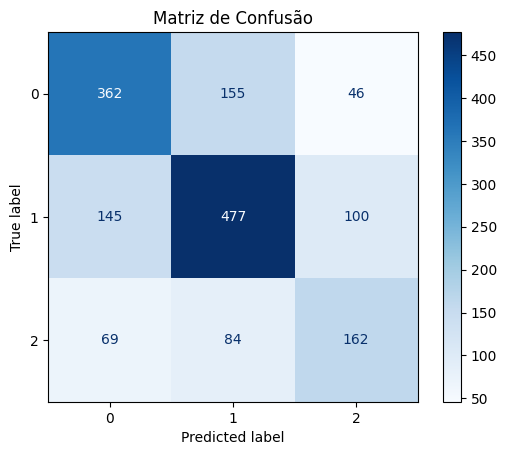

In [ ]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Baixe os recursos do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # 👈 necessário para corrigir o erro
nltk.download('wordnet')

# Carregue os conjuntos de dados
train_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep=';')
test_data = pd.read_csv("caminho do arquivo", encoding="iso-8859-1", sep=';')

# Função de pré-processamento
def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()

    # Remove pontuações
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenização
    tokens = word_tokenize(text, language="portuguese")

    # Remove stop words
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstroi o texto
    processed_text = ' '.join(tokens)

    return processed_text

# Aplica o pré-processamento
train_data['processed_response'] = train_data['response'].apply(preprocess_text)
test_data['processed_response'] = test_data['response'].apply(preprocess_text)

# Vetorização
vectorizer = CountVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(train_data['processed_response'])
X_test_vectorized = vectorizer.transform(test_data['processed_response'])

# Parâmetros para Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}

# Modelo SVM
svm_model = SVC()

# Grid Search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, train_data['code0_3'])

# Melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Avaliação
best_svm_model = grid_search.best_estimator_
predictions = best_svm_model.predict(X_test_vectorized)

# Salva rótulos verdadeiros e predições em CSV
results_df = pd.DataFrame({
    'true_label': test_data['code0_3'],
    'predicted_label': predictions
})

# Caminho e salvamento
results_df.to_csv("/content/svm_predictions.csv", index=False, encoding='utf-8')
print("\nArquivo 'svm_predictions.csv' criado com sucesso!")


# Métricas gerais
accuracy = accuracy_score(test_data['code0_3'], predictions)
precision = precision_score(test_data['code0_3'], predictions, average='weighted')
recall = recall_score(test_data['code0_3'], predictions, average='weighted')
f1 = f1_score(test_data['code0_3'], predictions, average='weighted')

print("\nMétricas gerais do modelo:")
print("Acurácia: {:.2f}%".format(100 * accuracy))
print("Precisão: {:.2f}".format(precision))
print("Revocação: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

# Relatório detalhado
print("\nRelatório por classe:")
print(classification_report(test_data['code0_3'], predictions, digits=2))

# % de acerto por classe
print("\nPercentual de acerto por classe:")
classes = sorted(test_data['code0_3'].unique())
for cls in classes:
    mask = test_data['code0_3'] == cls
    acc_cls = accuracy_score(test_data['code0_3'][mask], predictions[mask])
    print(f"Classe {cls}: {acc_cls * 100:.2f}% de acerto")

# Matriz de confusão
cm = confusion_matrix(test_data['code0_3'], predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusão")
plt.show()
